Question 1: Monte Carlo Simulation

Problem Statement: The probability that Hitter A draws a walk in a plate appearance is 7%, and the probability that Hitter B draws a walk in a plate appearance is 10%. In a given month, they each have 100 plate appearances. What is the probability that Hitter A draws more walks than Hitter B in that month?

Approach:
We will simulate the plate appearances for both Hitter A and Hitter B using their respective walk probabilities. Each plate appearance can be seen as a Bernoulli trial (success/failure) with a probability of success. We run the simulation for a large number of iterations to approximate the distribution of walks for each hitter, and then we count the cases where Hitter A has more walks than Hitter B.

Code:

In [2]:
import numpy as np  # Importing the numpy library for numerical operations

# Step 1: Define the simulation parameters
# We choose a large number of simulations (100,000) to get an accurate estimate
num_simulations = 100000  # Number of simulated months to run, enough to fill CLT (central limit theorem)
plate_appearances = 100    # Each hitter has 100 plate appearances in a month

# Step 2: Define the probabilities of drawing a walk for each hitter
prob_walk_hitter_a = 0.07  # Probability of Hitter A drawing a walk in one plate appearance
prob_walk_hitter_b = 0.10  # Probability of Hitter B drawing a walk in one plate appearance

# Step 3: Run the Monte Carlo simulation
# Simulate the number of walks for each hitter over `num_simulations` months
# We use the binomial distribution to model the number of walks out of 100 plate appearances
# For Hitter A, we simulate using his probability of drawing a walk
hitter_a_walks = np.random.binomial(plate_appearances, prob_walk_hitter_a, num_simulations)
# Similarly, for Hitter B, we use his probability of drawing a walk
hitter_b_walks = np.random.binomial(plate_appearances, prob_walk_hitter_b, num_simulations)

# Step 4: Calculate the probability that Hitter A has more walks than Hitter B
# Use numpy's mean function to determine the proportion of simulations where A's walks > B's walks
probability_hitter_a_more_walks = np.mean(hitter_a_walks > hitter_b_walks)

# Step 5: Print result
print(f"Question 1: Probability that Hitter A draws more walks than Hitter B: {probability_hitter_a_more_walks:.4f}")


Question 1: Probability that Hitter A draws more walks than Hitter B: 0.1860


Question 2: Probability of Pitch in Strike Zone Given Swing

Problem Statement: A pitcher pitches the ball into the strike zone 48% of the time. When a pitch is thrown in the strike zone, the batter swings at the pitch 64% of the time, and when the pitch is thrown out of the strike zone, the batter swings at the pitch 29% of the time. In a matchup of this batter and pitcher, a pitch is thrown and the batter swings. What is the probability that the pitch was in the strike zone?

Approach: Normal Simulation

    Calculate the total probability of a swing using the law of total probability:
    P(Swing)=P(Swing∣Strike Zone)⋅P(Strike Zone)+P(Swing∣Out of Strike Zone)⋅P(Out of Strike Zone)
    P(Swing)=P(Swing∣Strike Zone)⋅P(Strike Zone)+P(Swing∣Out of Strike Zone)⋅P(Out of Strike Zone)
    Use Bayes' Theorem to find P(Strike Zone∣Swing)P(Strike Zone∣Swing):
    P(Strike Zone∣Swing)=P(Swing∣Strike Zone)⋅P(Strike Zone)P(Swing)
    P(Strike Zone∣Swing)=P(Swing)P(Swing∣Strike Zone)⋅P(Strike Zone)​


In [8]:
# Given probabilities
p_strike_zone = 0.48  # P(Strike Zone)
p_swing_given_strike = 0.64  # P(Swing | Strike Zone)
p_swing_given_out_of_strike = 0.29  # P(Swing | Out of Strike Zone)

# Calculate P(Swing) using the law of total probability
p_swing = (p_swing_given_strike * p_strike_zone) + \
          (p_swing_given_out_of_strike * (1 - p_strike_zone))

# Apply Bayes' Theorem to calculate P(Strike Zone | Swing)
p_strike_given_swing = (p_swing_given_strike * p_strike_zone) / p_swing

# Print the result
print(f"Question 2: Probability that the pitch was in the strike zone given a swing: {p_strike_given_swing:.4f}")


Question 2: Probability that the pitch was in the strike zone given a swing: 0.6707


# Question 3: Linear Regression Analysis
Part (a) Probability of Lower Run Expectancy for Pitcher A

Problem Statement: Given the coefficients and standard errors for a linear regression model predicting run expectancy change, determine the probability that Pitcher A has a lower run expectancy change than Pitcher B.

Approach:

    Compute the run expectancy change for each pitcher using the linear model:
    Run Expectancy=Intercept+β1⋅Velocity+β2⋅Induced Vertical Break+β3⋅Release Height
    Run Expectancy=Intercept+β1​⋅Velocity+β2​⋅Induced Vertical Break+β3​⋅Release Height
    Calculate the standard error of the difference between the two pitchers’ run expectancies.
    Use the normal distribution to find the probability that Pitcher A’s run expectancy is lower than Pitcher B’s.

In [9]:
from scipy.stats import norm

# Given coefficients and standard error
intercept = 138
coef_velocity = -1.77
coef_vertical_break = -1.08
coef_release_height = 8.62
std_error = 9.0

# Pitcher characteristics
pitcher_a = {'Velocity': 92, 'VerticalBreak': 18, 'ReleaseHeight': 6}
pitcher_b = {'Velocity': 95, 'VerticalBreak': 12, 'ReleaseHeight': 5.5}

# Calculate run expectancy change for each pitcher
run_expectancy_a = (intercept +
                    coef_velocity * pitcher_a['Velocity'] +
                    coef_vertical_break * pitcher_a['VerticalBreak'] +
                    coef_release_height * pitcher_a['ReleaseHeight'])

run_expectancy_b = (intercept +
                    coef_velocity * pitcher_b['Velocity'] +
                    coef_vertical_break * pitcher_b['VerticalBreak'] +
                    coef_release_height * pitcher_b['ReleaseHeight'])

# Calculate the difference and standard error of the difference
difference = run_expectancy_a - run_expectancy_b
std_error_diff = std_error * np.sqrt(2)  # Standard error of the difference

# Calculate the Z-score
z_score = difference / std_error_diff

# Probability that Pitcher A has a lower run expectancy
probability_lower_expectancy = norm.cdf(z_score)

# Print the results
print(f"Run Expectancy Change - Pitcher A: {run_expectancy_a:.2f}")
print(f"Run Expectancy Change - Pitcher B: {run_expectancy_b:.2f}")
print(f"Difference: {difference:.2f}")
print(f"Standard Error of Difference: {std_error_diff:.2f}")
print(f"Z-score: {z_score:.4f}")
print(f"Question 3 Part (a): Probability that Pitcher A has a lower run expectancy change than Pitcher B: {probability_lower_expectancy:.4f}")


Run Expectancy Change - Pitcher A: 7.44
Run Expectancy Change - Pitcher B: 4.30
Difference: 3.14
Standard Error of Difference: 12.73
Z-score: 0.2467
Question 3 Part (a): Probability that Pitcher A has a lower run expectancy change than Pitcher B: 0.5974


Part (b): Regression Coefficients for Run Expectancy Change on Velocity and Release Height

Problem Statement: Given the coefficients from the regression of Induced Vertical Break on Velocity and Release Height, what would the coefficients be in a regression of Run Expectancy Change on Velocity and Release Height only?

Approach:

    Use the relationship between the coefficients of the first regression and the coefficients from the second regression to adjust the values.
    Apply formulas to derive the new coefficients.

In [10]:
# Given coefficients for IVB regression
intercept_ivb = -0.48
coef_velocity_ivb = 0.0126
coef_release_height_ivb = 2.60

# Original coefficients for run expectancy change
intercept_original = 138
coef_velocity_original = -1.77
coef_ivb_original = -1.08
coef_release_height_original = 8.62

# Calculate new coefficients
new_intercept = intercept_original + coef_ivb_original * intercept_ivb
new_coef_velocity = coef_velocity_original + coef_ivb_original * coef_velocity_ivb
new_coef_release_height = coef_release_height_original + coef_ivb_original * coef_release_height_ivb

# Print the new coefficients
print("Question 3 Part (b): New coefficients after removing Induced Vertical Break:")
print(f"Intercept: {new_intercept:.4f}")
print(f"Velocity: {new_coef_velocity:.4f}")
print(f"Release Height: {new_coef_release_height:.4f}")


Question 3 Part (b): New coefficients after removing Induced Vertical Break:
Intercept: 138.5184
Velocity: -1.7836
Release Height: 5.8120


Part (c): Effect of Adding Pitcher Height to the Model

Problem Statement: If the hypothesis is that taller pitchers are more effective, how would adding pitcher height change the coefficient of Release Height in the regression model from Part (b)?

Approach:

    Adding Pitcher Height to the regression model might reduce the magnitude of the Release Height coefficient because taller pitchers generally have higher release points, causing multicollinearity. The coefficient of Release Height will likely decrease in magnitude if Pitcher Height is added.

Part (d): Violations of Linearity Assumptions

Problem Statement: The original model assumes the variables are linearly related to each other. What is one way this assumption could be violated, and how could we model fastball effectiveness using these features without that assumption?

Approach:

    A potential violation is the interaction between velocity and induced vertical break, which may have a non-linear relationship. To address this, we can use non-linear models such as Decision Trees or Gradient Boosting.

# Question 4: Probability Mets Finish Third

Problem Statement: The Mets and Braves have 2 remaining games against each other. The Padres and Diamondbacks have 3 remaining games against each other. Assume the probability of each team winning any of the remaining games is 50%. What is the probability that the Mets finish the season as the third ranked of these four teams?

Simulation Approach:

    Simulate the outcomes of the remaining games multiple times (e.g., 100,000 times).
    For each simulation, compute the final standings based on the simulated results.
    Count the scenarios where the Mets finish exactly third.

Code:

In [11]:
import numpy as np

# Simulation parameters
num_simulations = 100000  # Number of simulations

# Initial standings
teams_initial_wins = {
    'Padres': 91,
    'Mets': 87,
    'Diamondbacks': 87,
    'Braves': 86
}

# Remaining games against each other
mets_braves_games = 2
padres_dbacks_games = 3

mets_third_count = 0

for _ in range(num_simulations):
    # Copy initial wins
    teams_wins = teams_initial_wins.copy()
    
    # Simulate Mets vs Braves games
    for _ in range(mets_braves_games):
        if np.random.rand() < 0.5:
            teams_wins['Mets'] += 1
        else:
            teams_wins['Braves'] += 1

    # Simulate Padres vs Diamondbacks games
    for _ in range(padres_dbacks_games):
        if np.random.rand() < 0.5:
            teams_wins['Padres'] += 1
        else:
            teams_wins['Diamondbacks'] += 1

    # Simulate other games (if any)
    # Assuming no other games as per the given data
    # If there are other games, they can be simulated independently

    # Create final standings
    # Teams are ordered by total wins, with ties broken by initial standings
    standings = sorted(teams_wins.items(), key=lambda x: (-x[1], list(teams_initial_wins.keys()).index(x[0])))

    # Assign ranks
    team_ranks = {team[0]: idx + 1 for idx, team in enumerate(standings)}

    # Check if Mets finish third
    if team_ranks['Mets'] == 3:
        mets_third_count += 1

# Calculate the probability
probability_mets_third = mets_third_count / num_simulations
print(f"Question 4: Probability that the Mets finish as the third ranked team: {probability_mets_third:.4f}")


Question 4: Probability that the Mets finish as the third ranked team: 0.3112


# Question 5: Determining the Value of pp for Home Team to Win 60% of Extra Inning Games

Approach:

To find the value of pp that results in the home team winning 60% of the extra inning games, we'll:

    Calculate the probability of the home team winning the game as a function of pp.

    Set up an equation where the total probability of the home team winning equals 60%.

    Solve for pp.

In [12]:
# Question 5: Calculating the Value of p for Home Team to Win 60% of Games

# Given probabilities
P_R = {
    0: 0.35,  # Probability road team scores 0 runs
    1: 0.40,  # Probability road team scores 1 run
    2: 0.15,  # Probability road team scores 2 runs
    3: 0.10   # Probability road team scores 3 runs
}

# Function to calculate overall win probability W as a function of p
def calculate_W(p):
    # Probability of home team winning in current inning
    P_win = P_R[0]*(p) + P_R[1]*(0.45) + P_R[2]*(0.10) + P_R[3]*(0)
    
    # Probability of game continuing
    P_continue = P_R[0]*(1 - p) + P_R[1]*(0.20) + P_R[2]*(0.15) + P_R[3]*(0.10)
    
    # Overall win probability
    W = P_win / (1 - P_continue)
    return W

# Target win probability
W_target = 0.60

# Solve for p using numerical methods
import numpy as np
from scipy.optimize import fsolve

# Define function to find root
def equation(p):
    return calculate_W(p) - W_target

# Initial guess for p
p_initial_guess = 0.5

# Solve for p
solution = fsolve(equation, p_initial_guess)

p_value = solution[0]

print(f"The value of p for the home team to win 60% of the games is approximately: {p_value:.4f}")


The value of p for the home team to win 60% of the games is approximately: 0.9107


# Question 6: You are tasked with constructing a model to determine the probability that a pitcher will throw
a pickoff throw over to first base instead of pitching the ball in situations where there is a runner
on first base. How would you construct the model given that you had access to the following:
Identities of all players on the field (fielders, pitcher, batter, runners), game state (number of
outs, runners on base, inning, score, count), ball and player time series tracking data (positions
for given timestamps), crowd size, pickoff statistics from the previous season, fielding
percentage for all fielders, temperature, day/night game indicator, average seasonal sprint
speed for all players, and pitch usage statistics for the pitcher.
Note: There is no need to find data and generate an actual model. Please just describe how you
would proceed assuming you had the data listed. Please limit your response to 300 words.


Approach:
To construct the model, I would start by compiling a dataset of all instances with a runner on first base, labeling each with whether a pickoff attempt occurred. Key features would include game state variables (inning, score, outs, count), player-specific metrics (pitcher's historical pickoff rates, runner's sprint speed and steal tendencies), and environmental factors (temperature, day/night, crowd size).

Time-series tracking data would be used to calculate the runner's lead distance and the pitcher's delivery times. These dynamic features are crucial as larger leads or slower deliveries may increase the likelihood of a pickoff attempt.

Given the binary nature of the outcome, I'd frame this as a classification problem. A logistic regression model could provide interpretability, showing how each feature affects the probability. Alternatively, tree-based models like Random Forests or Gradient Boosting could capture nonlinear relationships and interactions between variables.

To handle categorical variables like player identities, I'd use encoding techniques or consider embedding layers if using neural networks. Feature selection methods would help in reducing dimensionality, focusing on the most predictive variables.

The model would be trained using cross-validation to ensure it generalizes well. Since pickoff attempts may be relatively rare events, I'd address any class imbalance using resampling techniques or by adjusting class weights.

Finally, I'd evaluate the model using metrics such as precision, recall, and AUC-ROC. Insights from feature importance analysis could inform coaching strategies, such as anticipating pickoff attempts based on specific runners or game situations.

# Question 7: A baseball team is considering offering an extension to one of their young players. 
The following table has the player’s average WAR (wins above replacement) projections for the next 8 seasons
as of today.
The team has two possible options for contracts as of today:
a) The team can go year-to-year on the contract. At the end of each year the team can sign the
player to a 1-year guaranteed deal for the next season. The expected salaries for each of those 6
years are shown in the table, however based on the player’s performance in each year those
salaries may go up or down. If the team chooses not to offer the next year’s contract, the player
is released and becomes a Free Agent. The player is not allowed to opt out after any of the first
5 years, but becomes a Free Agent after the 6th season.
b) The team can offer an 8-year guaranteed contract at the terms in the table below. The
salaries for all 8 seasons are guaranteed immediately and the player becomes a Free Agent after
the 8th season.
What value of X would you guarantee for the final year of the 8-year guaranteed contract to
have a break-even value of 0 between the two contracts (i.e. you would be indifferent to which
of the two contracts the team offers the player)? Explain any simplifying assumptions you make
and how you might improve your estimate with more time. Please limit your answer to 300
words.


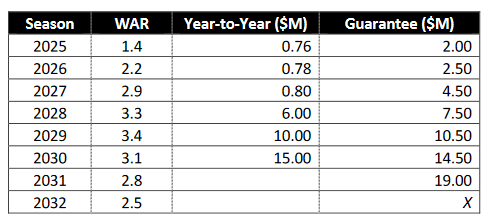

Conclusion:

The main value of the contract for the team depends heavily on market factors and the specific value the team places on retaining the player long-term. In this context, Option A (Year-to-Year) provides more flexibility and a lower overall cost, even when discounting for future cash flows. In contrast, Option B (Guaranteed) locks the team into a higher present value cost without additional benefits.

Therefore, from a financial perspective, Option A would be more favorable unless there are strategic or market-driven reasons (e.g., player value increasing significantly) that justify a high XX-value in Option B. This analysis assumes a discount rate of 8%, but the decision could change based on the team's market, risk tolerance, and expected future player performance.

This conclusion can vary significantly depending on the team’s market conditions, as some markets might prefer cost certainty over flexibility, while others might prioritize financial flexibility and reduced long-term risk.

# Question 8: Impact of Playoff Expansion on Team-Building Strategy
Problem Statement:

If MLB expands the playoff system to include 8 teams in each league, with a 3-game series in the first round, a 5-game series in the second round, and 7-game series for the Championship Series and World Series, how should organizations adjust their team-building approach?


Proposal for Optimizing Starting Pitcher Usage in MLB

Objective:
This proposal aims to demonstrate that using starting pitchers in shorter, more frequent outings can:

    Maximize their effectiveness per inning.
    Reduce fatigue and the risk of injuries.
    Improve overall team performance by preventing less effective relief innings from impacting the game outcome.

Current Pitching Usage Analysis:

    Average Pitches per Start: 86.2 pitches.
    Average Innings per Start: 5.24 innings.
    Average Pitches per Inning: Approximately 16.45 pitches.

Rest Guidelines Based on Pitch Count:
Pitches Thrown	Required Rest Days
1-30	0
31-45	1
46-60	2
61-80	3
81-105	4
106+	5
Proposed Strategy:

    Shorter Outings for Starters:
        Limit starters to approximately 50-60 pitches per outing (~3-4 innings).
        This allows starters to maintain peak performance and reduces fatigue.

    Increased Frequency:
        Shorter outings enable pitchers to pitch more frequently, potentially with 2-3 days of rest instead of 4-5 days.

    Tandem Starters:
        Use two starters in one game, each pitching 3-4 innings, which minimizes reliance on less effective relievers.

Rationale and Expected Benefits:

    Enhanced Performance:
        Shorter outings keep pitchers in their optimal range, improving overall effectiveness.
        This approach mitigates the performance decline often seen in later innings due to fatigue.

    Injury Prevention:
        Limiting pitch counts reduces strain on pitchers' arms, potentially lowering the risk of injuries.
        More frequent outings, combined with reduced pitch counts, maintain fitness while avoiding overuse.

    Bullpen Management:
        Tandem starters cover more innings, reducing the number of innings left for relievers.
        Fewer relief innings lower the chance of a single bad inning negatively impacting the game.

    Increased Flexibility:
        More frequent appearances allow teams to adapt to matchups and game situations more effectively.
        Additional rest days for each pitcher provide opportunities to make in-game adjustments.

Implementation and Next Steps:

    Data Collection and Analysis:
        Gather performance data for pitchers based on their pitch count and rest days.
        Analyze trends in effectiveness, velocity, and injury rates.

    Pilot Testing:
        Implement the proposed strategy with select pitchers or at the minor league level.
        Monitor and record results on performance, recovery, and player feedback.

    Training Adjustments:
        Adjust training and conditioning routines to prepare pitchers for shorter, more frequent outings.
        Emphasize recovery and monitoring.

    Team and Player Communication:
        Ensure alignment with coaching staff and players regarding the strategy.
        Clearly communicate the potential benefits and address any concerns.